# Data visualisation with `ggplot`


<img src="https://ih0.redbubble.net/image.543334423.1461/flat,1000x1000,075,f.u1.jpg" alt="ggplot" width="200">



(please spend 5 min reading the previous tutorial on [data manipulation using `data.table`](https://computational-entomology.net/jhub/user/quentin/notebooks/data.table.R.ipynb))


## Two families of visualisation

* Exploration(quality control, hypothesis testing/building)
* Communication (poster, presentation, website...)

Different tools, amount of effort, approaches... Investigations: squizz as much information as you can. Communication, summarise data to address a question in a given narrative.


## Today's plan of action:

1. Discuss the concepts behind `ggplot` vs `plot`
2. Plot simple graphs
3. Explain what has happened in the background
4. Discuss the different components of a graph
5. Make your own graphs
5. Basics of computer graphics (edit vectorial vs raster images)

## About these notebooks

1. File/make a copy/...
2. (rename)/save
3. Double click on a **cell** to edit
4. SHIFT + ENTER to run the whole cell and move to the next



## plot vs ggplot

**Imperative** vs **declarative** programming

* Imperative: give machine instructions on how to proceed (e.g. "draw a blue line between ($X_1, Y_1$) and ($X_2, Y_2$)"). You are the architect and the builder and the engineer and...
* Declarative: State the relationships you are interested in and let the machine handle the details (e.g. "draw lines, pick a different colour for each treatment").

Using a declarative paradigm means you can focus on the high-level questions. Fewer lines of code = less time and fewer errors (unless you are a very good programmer!). `R` is a "high-level" (i.e. abstracted) programming language. e.g. when you run `lm( y ~ x_1 * x_2)`, you encapsulate your model in a syntactic (grammatical) form (think about the alternative of coding a simple linear fit by hand!).

`ggplot` is an implementation of the "[grammar of graphics](https://en.wikipedia.org/wiki/Leland_Wilkinson)", a declarative approach to graphics.


## Visualisation in the workflow

![https://r4ds.had.co.nz/explore-intro.html](https://d33wubrfki0l68.cloudfront.net/795c039ba2520455d833b4034befc8cf360a70ba/558a5/diagrams/data-science-explore.png)

In [11]:
library(data.table)
dummy_dt = data.table(y=c(05,10,7,15,10,20,11), 
                      x=c(1, 1, 2, 2,3, 3, 4), 
                      condition=rep(c('A', 'B'), length.out=7))
dummy_dt

y,x,condition
<dbl>,<dbl>,<chr>
5,1,A
10,1,B
7,2,A
15,2,B
10,3,A
20,3,B
11,4,A


How would you draw `y ~ x * condition` (y versus x, by condition) as lines between $(x,y)$ points with a different colour for each value of `condition`?


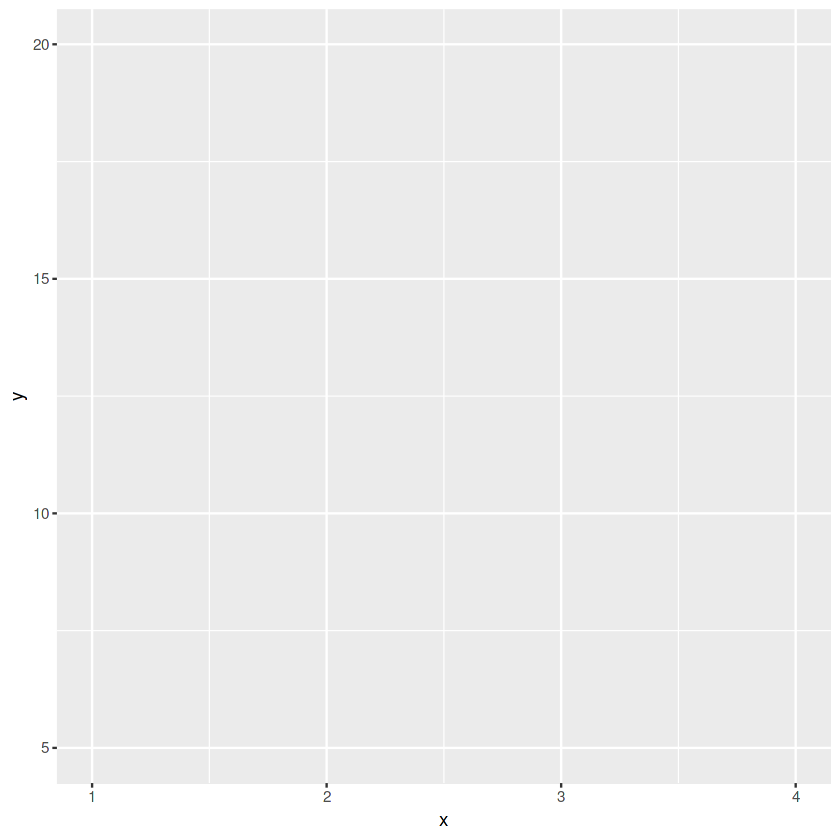

In [20]:
# code something here:
# enjoy!
library(ggplot2)
CONDITION_PALETTE <- c('#aaaa00','blue')


ggplot(dummy_dt,aes(x=x, y=y, colour=condition)) 


Starting from last time's tutorial we have more realistic data to look at

In [21]:
## last tutorial's data
URL <- "https://github.com/qgeissmann/r_workshops/raw/master/2019-ag_practices_effect_on_pest.csv"
dt <- fread(URL, stringsAsFactors = TRUE) # forces string as factors
dt[, date := as.POSIXct(date)]
dt

date,site,practice,N_pest,N_para,N_pred
<dttm>,<fct>,<fct>,<int>,<int>,<int>
2019-03-08,A,conv,0,0,0
2019-03-08,A,conv,0,0,0
2019-03-08,A,conv,0,0,0
2019-03-08,B,conv,0,0,0
2019-03-08,B,conv,0,0,0
2019-03-08,B,conv,0,0,0
2019-03-08,B,conv,0,0,0
2019-03-08,C,conv,0,0,0
2019-03-08,C,conv,0,0,0


## Translating a request in a ggplot object

I would like to: 

* plot the number of pests (`N_pest`, y axis) vs the number of predators (`N_pred`, x axis).
* use a different colour for each site
* for each row of data, I want a point

Draw a mock graph on paper before anything!

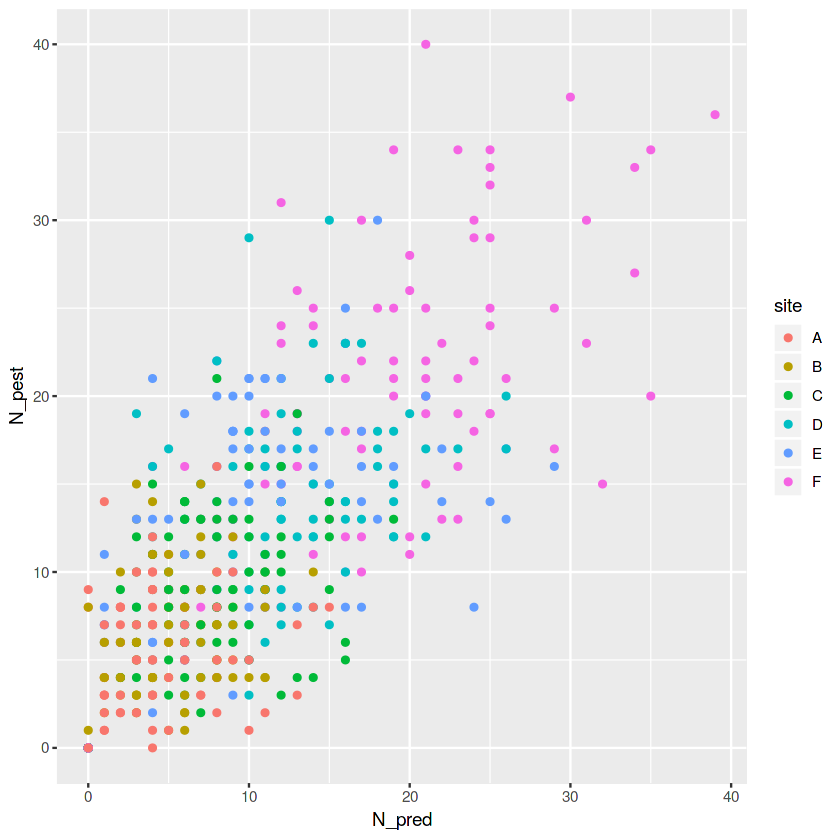

In [22]:
library(ggplot2)

ggplot(dt, aes(y=N_pest, x=N_pred, colour=site)) + 
        geom_point()

## What has happened

A lot of frustration in using ggplot comes from the lack of understanding of the underlying concepts.

* aesthetics: the relationship between variables and graphic elements (each layer needs and aes, but it can be inherited) 
* data: a dataframe where columns match aesthetics names
* layer: something you want to draw (e.g. a geometry such as `geom_point`, `geom_line`, ...)
* scales/coord: define a coordinate system
* facet: a grid system to make subplots
* theme: rules fonts, colour palettes, ...


## Improving graph content

Issues with this graph:

* Discrete numbers collide: points superimpose!
* Colour is difficult to read for more than 4 classes


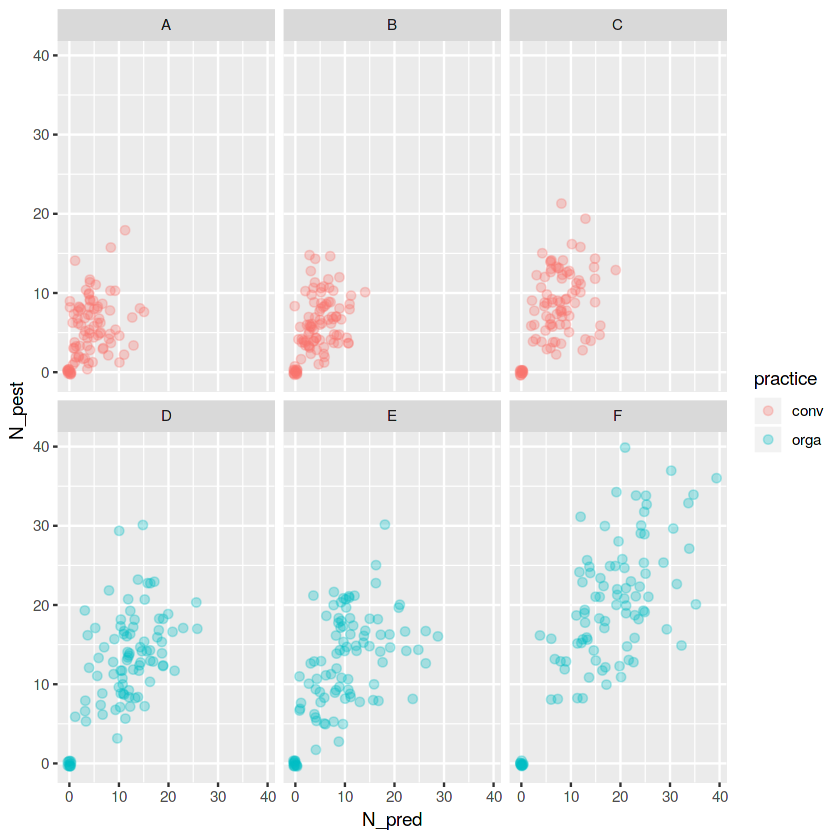

In [23]:
ggplot(dt, aes(y=N_pest, x=N_pred, colour=practice)) + 
        geom_jitter(alpha=.3, size=2) + facet_wrap( ~ site) 

Typical quality control graph, not intended for publication. Note how jitter and alpha < 1 reveals zero inflation!

## The importance of layers and aes

Discuss the difference between these plots:

In [ ]:
ggplot(dt, aes(y=N_pest, x=date, colour=practice)) + 
    geom_point()

ggplot(dt, aes(y=N_pest, x=date)) + 
    geom_point(aes(colour=practice))

ggplot(dt, aes(y=N_pest, x=date)) + 
    geom_point(colour='red')

ggplot(dt, aes(y=N_pest, x=date, colour = N_para)) + 
    geom_point()

## Make your own graphs

- [ ] Show a histogram of the number of predator/prey/parasite for all sites (across all time points)
- [ ] Boxplot the number of captures of p/p/p between sites and treatments
- [ ] Plot the number of predator throughout the season for each site as points
- [ ] Same, but an average line of all sites for each treatment
- [ ] On top of the line, could we put a point where the size is proportional to the number of samples (row) used?
- [ ] Use the long-format data to plot the average number of insect vs species

## Save your graph as a PDF (or svg) 

Vectorial graphics are:

* Scale-independent
* conservative (can always go from vectorial to raster, and can include rater inside vectorial)
* Parsable (i.e. open science/ metaanalysis)
* Not always suitable for heatmaps, natural images, ...
* Can combine graphics from different sources (picture, software)


In [ ]:
pdf('my_graph.pdf', w=16,h=9)
ggplot(dt, aes(y=N_pest, x=N_pred, colour=practice)) + 
        geom_jitter(alpha=.3, size=2) + facet_wrap( ~ site) 
dev.off()

## Play with inskcape:

* Remove individual objects
* Replace legends
* Align objects
* Draw arrows
* Add a picture
* Select all red points and change their colours
* ...

## Resources

* [ggplot cheatsheet](https://rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf)
* [`R` graph gallery](https://www.r-graph-gallery.com/)
* [Inkscape](https://inkscape.org/)